In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import autoreload
import wordcloud as wc
import matplotlib.pyplot as plt
import missingno as msno
import csv
import os
import sys

from collections import defaultdict, Counter

%matplotlib inline
%reload_ext autoreload
%autoreload 2

sb.set()
sb.set_style("dark")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

In [2]:
df = pd.read_csv("D:\Open Classroom\Data Files\E-commerce for Women Clothngs\Womens-Clothing-E-Commerce-Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


#### Data Cleaning

In [3]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [6]:
df.rename(columns = {"Clothing ID": "clothingID", "Age": "age",
                     "Title": "title", 	"Review Text": "reviewText",
                     "Rating": "rating", "Recommended IND": "recommendedInd",
                     "Positive Feedback Count": "posFeedCount", "Division Name": "divName",
                     "Department Name": "deptName",	"Class Name": "className"}, inplace = True)
df.head()

,clothingID,age,title,reviewText,rating,recommendedInd,posFeedCount,divName,deptName,className
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23488 entries, 0 to 23487
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   clothingID      23488 non-null  int64 
 1   age             23488 non-null  int64 
 2   title           19678 non-null  object
 3   reviewText      22643 non-null  object
 4   rating          23488 non-null  int64 
 5   recommendedInd  23488 non-null  int64 
 6   posFeedCount    23488 non-null  int64 
 7   divName         23474 non-null  object
 8   deptName        23474 non-null  object
 9   className       23474 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


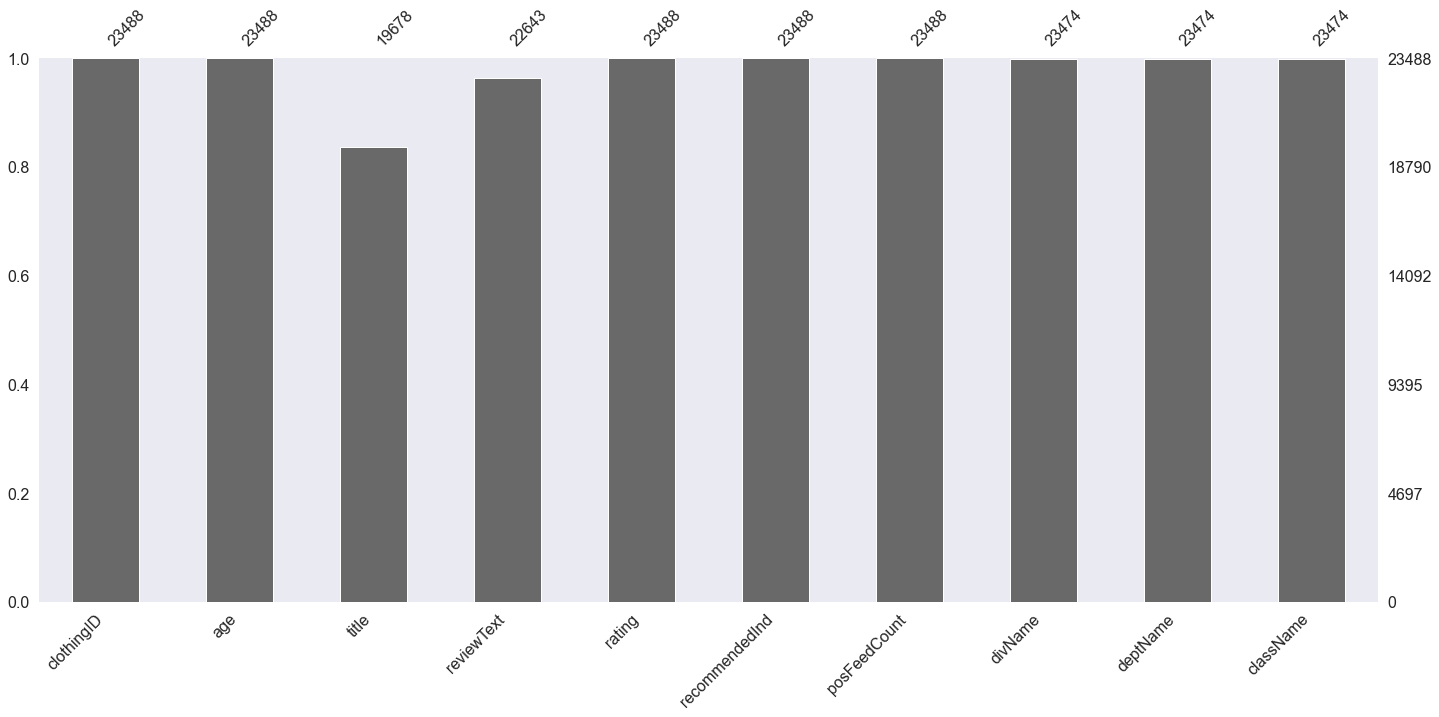

In [8]:
msno.bar(df)

In [12]:
df.dropna(axis = "index", how = "any", inplace = True)

#### EDA

In [56]:
df.groupby("className").agg({"rating": "sum"}).sort_values(by = "rating", ascending = False).rename_axis("Clothing").rename(columns = {"rating": "Total Ratings"})


,Total Ratings
Clothing,
Dresses,22230
Knits,16455
Blouses,10742
Sweaters,5073
Pants,4954
Jeans,4219
Fine gauge,3945
Skirts,3379
Jackets,2575


In [21]:
df["title"].unique()

array(['Some major design flaws', 'My favorite buy!', 'Flattering shirt',
       ..., 'Please make more like this one!', 'Overall',
       'Full of perfection'], dtype=object)

In [25]:
df["age"].unique()

array([60, 50, 47, 49, 39, 24, 34, 53, 44, 41, 32, 33, 55, 31, 28, 46, 21,
       36, 65, 38, 23, 67, 48, 43, 56, 66, 61, 52, 57, 40, 37, 27, 62, 68,
       51, 83, 69, 54, 64, 42, 30, 35, 26, 63, 29, 25, 45, 59, 74, 70, 58,
       22, 20, 71, 80, 93, 82, 72, 77, 85, 73, 78, 79, 19, 84, 75, 76, 81,
       90, 86, 89, 99, 18, 91, 92, 94, 87], dtype=int64)

0962960

In [28]:
round(df["age"].agg("mean"), 2)

43.26

In [30]:
round(df.describe(), 2)

,clothingID,age,rating,recommendedInd,posFeedCount
count,19664.00,19664.00,19664.00,19664.00,19664.00
mean,921.31,43.26,4.18,0.82,2.65
std,200.22,12.26,1.11,0.39,5.84
min,1.00,18.00,1.00,0.00,0.00
25%,861.00,34.00,4.00,1.00,0.00
50%,936.00,41.00,5.00,1.00,1.00
75%,1078.00,52.00,5.00,1.00,3.00
max,1205.00,99.00,5.00,1.00,122.00


In [54]:
ageClothing = df.groupby("className")
getCloth = ageClothing.get_group("Dresses")
round(ageClothing["age"].agg("mean"), 1).to_frame().sort_values(by = "age", ascending = False).rename_axis("Clothing")

,age
Clothing,
Sweaters,45.2
Fine gauge,44.9
Trend,44.3
Blouses,44.2
Outerwear,44.1
Pants,44.0
Jackets,43.9
Knits,43.6
Sleep,43.6


In [57]:
df.head()

,clothingID,age,title,reviewText,rating,recommendedInd,posFeedCount,divName,deptName,className
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [70]:
df.groupby("className").agg({"posFeedCount": "sum"}).sort_values(by = "posFeedCount", ascending = False).rename_axis("Clothing").rename(columns = {"posFeedCount": "Positive Feedback"}).style.background_gradient(cmap = "viridis")

,Positive Feedback
Clothing,
Dresses,17135
Knits,10073
Blouses,7388
Sweaters,2821
Pants,2803
Fine gauge,1977
Skirts,1967
Jeans,1831
Jackets,1739


In [72]:
df["divName"].value_counts()

General           11664
General Petite     6780
Initmates          1220
Name: divName, dtype: int64

In [73]:
df["deptName"].unique()

array(['Dresses', 'Bottoms', 'Tops', 'Intimate', 'Jackets', 'Trend'],
      dtype=object)